In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
%matplotlib inline

In [4]:
train= pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


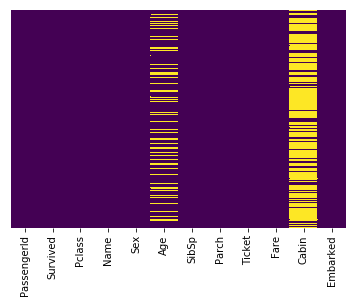

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

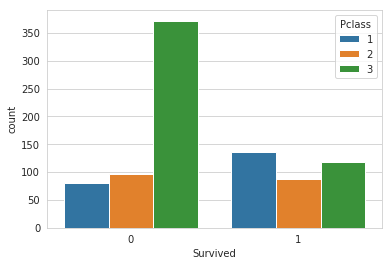

In [8]:
sns.countplot(x='Survived', data=train, hue= 'Pclass')

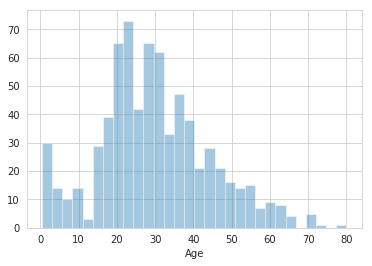

In [9]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

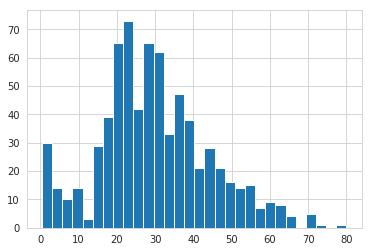

In [10]:
train['Age'].hist(bins=30)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


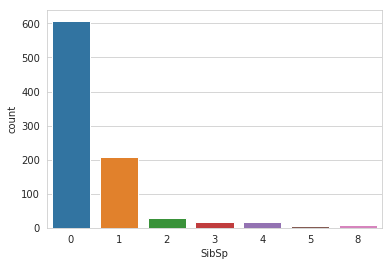

In [12]:
sns.countplot(train['SibSp'])

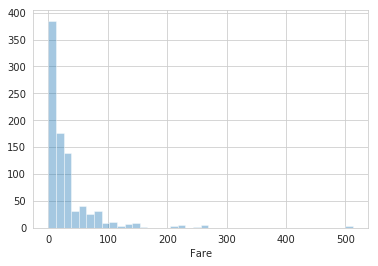

In [13]:
sns.distplot(train['Fare'], kde=False, bins=40)

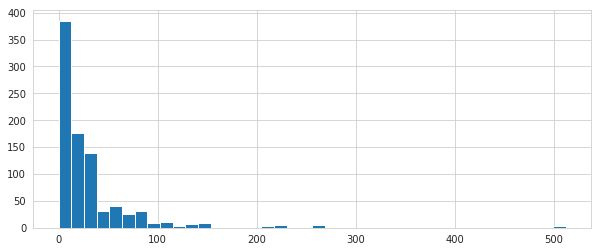

In [14]:
train['Fare'].hist(bins = 40 , figsize=(10,4))

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist',bins=30)

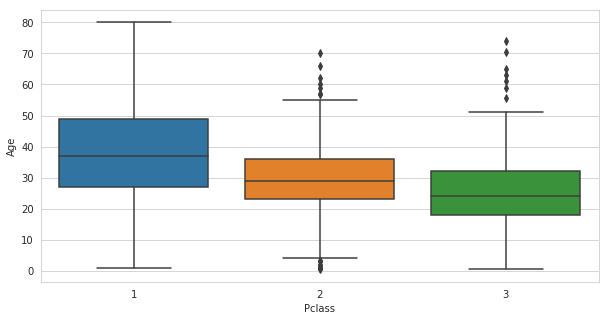

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age', data=train)

In [18]:
def imp(x):
    age=x[0]
    pclass=x[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass==2:
            return 29
        else :
            return 24
    else:
        return age
        

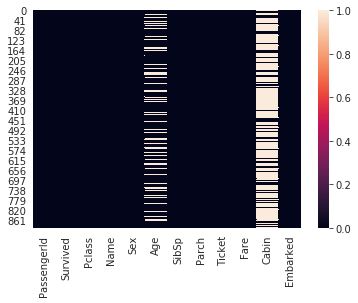

In [19]:
sns.heatmap(train.isnull())

In [20]:
train['Age']=train[['Age','Pclass']].apply(imp, axis=1)

In [21]:
train.drop('Cabin', axis=1, inplace=True)

In [22]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [23]:
embark=pd.get_dummies(train['Embarked'], drop_first=True)

In [24]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [25]:
train=pd.concat([train,sex,embark], axis=1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


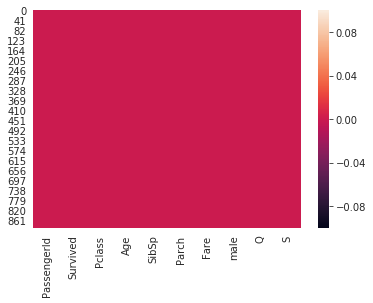

In [31]:
sns.heatmap(train.isnull())

# Building Model 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


In [32]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
pred = lr.predict(x_test)

In [35]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

